In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import datetime
#import pickle



# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [48]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=91.001, size=1)
lngs = np.random.uniform(low=-180.000, high=180.001, size=1)

#print(lats)
#print(lngs)

lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities[0])

1
san ignacio


## Perform API Calls

In [49]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

search_ctr = 0
miss_city_ctr = 0
found_ctr=0
ls_CityNames = []
dct_WeatherData = {}
df_all_city_weather = pd.DataFrame()

#for city in cities:
while found_ctr <= 500:     
    
    if search_ctr == 600:
        time.sleep(61)
    
    #print("Len of cities: " + str(len(cities)))
    #print("search counter: " + str(search_ctr))
    #print("search city: " + cities[search_ctr])
    
    query_url = url + "&q=" + cities[search_ctr]
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()    
    
    if weather_json['cod']==200:
           
        found_ctr = found_ctr + 1
        city_num = found_ctr
        city_name = cities[search_ctr]
    
    
        print("City No." + str(city_num) + ": "+ city_name) 
        
        ls_CityNames.append(city_name)
        
        dict_wkng = {}
        dict_wkng['city_lat'] = weather_json['coord']['lat']
        dict_wkng['city_temp'] = weather_json['main']['temp']
        dict_wkng['city_hum'] = weather_json['main']['humidity']
        dict_wkng['city_cld'] = weather_json['clouds']['all']
        dict_wkng['city_wnd'] = weather_json['wind']['speed']

        dct_WeatherData[city_name] = dict_wkng

    search_ctr = search_ctr + 1
    
    need_another_city = True
        
    while need_another_city: 
            
        miss_city_ctr = miss_city_ctr + 1
            
        lat = np.random.uniform(low=-90.000, high=91.001, size=1)
        lng = np.random.uniform(low=-180.000, high=180.001, size=1)

        #lat_lng = zip(lats, lngs)

        # Identify nearest city for each lat, lng combination
        city = citipy.nearest_city(lat, lng).city_name

        # If the city is unique, then add it to a our cities list
        if city not in cities:
            cities.append(city)
            need_another_city = False   
        
    
    
df_one_city_weather = pd.DataFrame.from_dict(dct_WeatherData)
df_one_city_weather_T = df_one_city_weather.T
df_one_city_weather_T.rename(columns={'city_lat': 'Latitude (degrees)','city_temp': 'Temperature (F)','city_hum': 'Relative Humidity (%)','city_cld': 'Cloud Cover (%)','city_wnd': 'Wind Speed (mph)'})
df_all_city_weather = df_all_city_weather.append(df_one_city_weather_T)        
        


df_all_city_weather.to_csv("All Weather Data.csv")
    

City No.1: san ignacio
City No.2: aviles
City No.3: burnie
City No.4: aleppo
City No.5: dikson
City No.6: punta arenas
City No.7: saldanha
City No.8: vaini
City No.9: mataura
City No.10: hermanus
City No.11: huarmey
City No.12: faanui
City No.13: olean
City No.14: ormara
City No.15: rikitea
City No.16: lahaina
City No.17: port blair
City No.18: chapais
City No.19: san patricio
City No.20: port alfred
City No.21: sur
City No.22: upernavik
City No.23: panzhihua
City No.24: bluff
City No.25: ushuaia
City No.26: tuktoyaktuk
City No.27: chicama
City No.28: cape town
City No.29: barrow
City No.30: new norfolk
City No.31: karakol
City No.32: gat
City No.33: ornskoldsvik
City No.34: sisimiut
City No.35: chokurdakh
City No.36: busselton
City No.37: khatanga
City No.38: struthers
City No.39: puerto ayora
City No.40: yellowknife
City No.41: suruc
City No.42: avarua
City No.43: portland
City No.44: hobart
City No.45: carnarvon
City No.46: mehamn
City No.47: benicarlo
City No.48: lebu
City No.49: k

City No.376: kodiak
City No.377: hare bay
City No.378: srednekolymsk
City No.379: longyearbyen
City No.380: ponta delgada
City No.381: esil
City No.382: oistins
City No.383: chabahar
City No.384: golden
City No.385: nazret
City No.386: iseyin
City No.387: chunoyar
City No.388: dhidhdhoo
City No.389: casablanca
City No.390: northam
City No.391: misratah
City No.392: pochutla
City No.393: eyl
City No.394: acapulco
City No.395: shubarkuduk
City No.396: nanae
City No.397: elko
City No.398: kalaleh
City No.399: pueblo
City No.400: isla mujeres
City No.401: shimoda
City No.402: baran
City No.403: sestri levante
City No.404: puerto escondido
City No.405: robe
City No.406: ancud
City No.407: vetlanda
City No.408: phalodi
City No.409: general pico
City No.410: prachuap khiri khan
City No.411: imeni zhelyabova
City No.412: nanortalik
City No.413: pierre
City No.414: kloulklubed
City No.415: tagusao
City No.416: yaan
City No.417: hoima
City No.418: chippewa falls
City No.419: wajima
City No.420: 

In [50]:
#for i in range( 1,3):
#    infile = open('200_cities_'+ i,'rb')
#    dct_WeatherData = pickle.load(infile)
#    infile.close()

#df_city_weather = pd.DataFrame.from_dict(dct_WeatherData)
#print(df_one_city_weather)
#df_city_weather_T = df_city_weather.T
#df_city_weather_T.rename(columns={'city_lat': 'Latitude (degrees)','city_temp': 'Temperature (F)','city_hum': 'Relative Humidity (%)','city_cld': 'Cloud Cover (%)','city_wnd': 'Wind Speed (mph)'})
#df_all_city_weather = df_all_city_weather.append(df_city_weather_T)        
        

#print(miss_city_ctr)
#print(len(cities))    
#print(dct_WeatherData)
#print(df_all_city_weather)
#df_all_city_weather.to_csv("All Weather Data.csv")

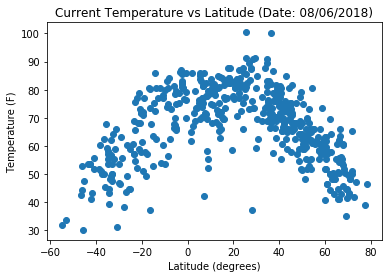

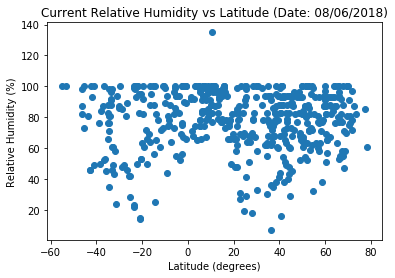

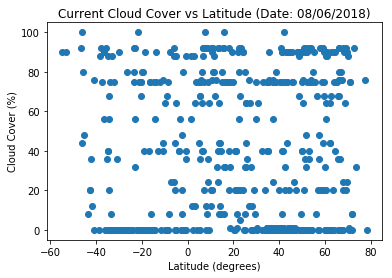

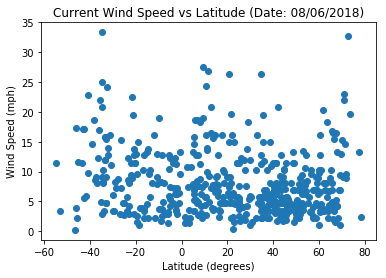

In [51]:

ls_x_lats = []
ls_y_temps = []
ls_y_hums = []
ls_y_clds = []
ls_y_wspds = []



for city in ls_CityNames:
    ls_x_lats.append(dct_WeatherData[city]['city_lat'])
    ls_y_temps.append(dct_WeatherData[city]['city_temp'])
    ls_y_hums.append(dct_WeatherData[city]['city_hum'])
    ls_y_clds.append(dct_WeatherData[city]['city_cld'])
    ls_y_wspds.append(dct_WeatherData[city]['city_wnd'])


ts = time.time()
#print(ts)    

#st1 = datetime.datetime.fromtimestamp(ts).strftime('%Y-%m-%d %H:%M:%S')
#print(st1)

st2 = datetime.datetime.fromtimestamp(ts).strftime('%m/%d/%Y')
#print(st2)
    
plt.scatter(ls_x_lats, ls_y_temps, marker="o")# , c=color_val, edgecolors="black", s=size_values, alpha=0.60, label=city_type)
plt.xlabel('Latitude (degrees)')
plt.ylabel('Temperature (F)')
plt.title('Current Temperature vs Latitude (Date: ' + st2 + ')')
plt.savefig('Current Temperature vs Latitude.png')
plt.show()

plt.scatter(ls_x_lats, ls_y_hums, marker="o")
plt.xlabel('Latitude (degrees)')
plt.ylabel('Relative Humidity (%)')
plt.title('Current Relative Humidity vs Latitude (Date: ' + st2 + ')')
plt.savefig('Current Relative Humidity vs Latitude.png')
plt.show()

plt.scatter(ls_x_lats, ls_y_clds, marker="o")
plt.xlabel('Latitude (degrees)')
plt.ylabel('Cloud Cover (%)')
plt.title('Current Cloud Cover vs Latitude (Date: ' + st2 + ')')
plt.savefig('Current Cloud Cover vs Latitude.png')
plt.show()

plt.scatter(ls_x_lats, ls_y_wspds, marker="o")
plt.xlabel('Latitude (degrees)')
plt.ylabel('Wind Speed (mph)')
plt.title('Current Wind Speed vs Latitude (Date: ' + st2 + ')')
plt.savefig('Current Wind Speed vs Latitude.png')
plt.show()